In [128]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import quandl
quandl.ApiConfig.api_key = "32peB6ExRM7Lihbpsdsd"
import seaborn as sns
sns.set()
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob

In [129]:
#read the csv file containing tweets about 'Tesla'
tweets = pd.read_csv('../using_twint/tesla_tweets_3.csv', low_memory=False)
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweets_count,likes_count,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url
0,682701956268343296,682701956268343296,1451603805000,2015-12-31,18:16:45,EDT,18131006,bgr,BGR.com,NaN,...,6,2,NaN,[],[],https://twitter.com/BGR/status/682701956268343296,NaN,NaN,0,https://pbs.twimg.com/profile_images/900756472...
1,682697919368196097,682697919368196097,1451602842000,2015-12-31,18:00:42,EDT,25053299,fortunemagazine,FORTUNE,NaN,...,15,21,NaN,[],[],https://twitter.com/FortuneMagazine/status/682...,NaN,NaN,0,https://pbs.twimg.com/profile_images/875382047...
2,682696607691755522,682696607691755522,1451602529000,2015-12-31,17:55:29,EDT,15342414,ricardoblanco,Mr. ¯\_(ツ)_/¯hite,NaN,...,0,0,NaN,[],[],https://twitter.com/RicardoBlanco/status/68269...,NaN,NaN,0,https://pbs.twimg.com/profile_images/113225875...
3,682695473803612160,682695053899345920,1451602259000,2015-12-31,17:50:59,EDT,15227849,semil,Semil,NaN,...,0,4,NaN,[],[],https://twitter.com/semil/status/6826954738036...,NaN,NaN,0,https://pbs.twimg.com/profile_images/997692272...
4,682688694910894080,682688694910894080,1451600643000,2015-12-31,17:24:03,EDT,38360819,alzeidenfeld,Al Smizzle,NaN,...,0,1,NaN,['#periscope'],[],https://twitter.com/AlZeidenfeld/status/682688...,NaN,NaN,0,https://pbs.twimg.com/profile_images/932784159...


In [130]:
#get a particular tweet text
some_tweet = tweets.iloc[random.randint(1, 100)]['tweet']
print(some_tweet)
#get the 'sentiment' of a particular tweet 
analysis = TextBlob(some_tweet)
print(analysis.sentiment)

Faraday Future released a teaser video of its ‘Tesla Killer’  http://bgr.co/K69W9vo  pic.twitter.com/ReqEW1I2Nc
Sentiment(polarity=0.0, subjectivity=0.125)


In [131]:
tweets['polarity'] = a = tweets['tweet'].apply(lambda x:TextBlob(x).polarity)
tweets['subjectivity'] = b = tweets['tweet'].apply(lambda x:TextBlob(x).subjectivity)

In [132]:
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url,polarity,subjectivity
0,682701956268343296,682701956268343296,1451603805000,2015-12-31,18:16:45,EDT,18131006,bgr,BGR.com,NaN,...,NaN,[],[],https://twitter.com/BGR/status/682701956268343296,NaN,NaN,0,https://pbs.twimg.com/profile_images/900756472...,-0.166667,0.166667
1,682697919368196097,682697919368196097,1451602842000,2015-12-31,18:00:42,EDT,25053299,fortunemagazine,FORTUNE,NaN,...,NaN,[],[],https://twitter.com/FortuneMagazine/status/682...,NaN,NaN,0,https://pbs.twimg.com/profile_images/875382047...,0.500000,0.900000
2,682696607691755522,682696607691755522,1451602529000,2015-12-31,17:55:29,EDT,15342414,ricardoblanco,Mr. ¯\_(ツ)_/¯hite,NaN,...,NaN,[],[],https://twitter.com/RicardoBlanco/status/68269...,NaN,NaN,0,https://pbs.twimg.com/profile_images/113225875...,0.000000,1.000000
3,682695473803612160,682695053899345920,1451602259000,2015-12-31,17:50:59,EDT,15227849,semil,Semil,NaN,...,NaN,[],[],https://twitter.com/semil/status/6826954738036...,NaN,NaN,0,https://pbs.twimg.com/profile_images/997692272...,0.360000,0.770000
4,682688694910894080,682688694910894080,1451600643000,2015-12-31,17:24:03,EDT,38360819,alzeidenfeld,Al Smizzle,NaN,...,NaN,['#periscope'],[],https://twitter.com/AlZeidenfeld/status/682688...,NaN,NaN,0,https://pbs.twimg.com/profile_images/932784159...,0.136364,0.477273


In [133]:
#covert the date column to datetime type
tweets.date = pd.to_datetime(tweets.date)
#append weekofyear, weekday, year based on date, 0=Mon, 6=Sun
tweets['weekofyear'] = tweets['date'].dt.weekofyear
tweets['weekday'] = tweets['date'].dt.weekday
tweets['year'] = tweets['date'].dt.year

In [134]:
columns = ['polarity', 'weekofyear']
weekly_pol = tweets.loc[tweets['year'] == 2015, columns].groupby('weekofyear').mean()
weekly_pol = weekly_pol[:-1]

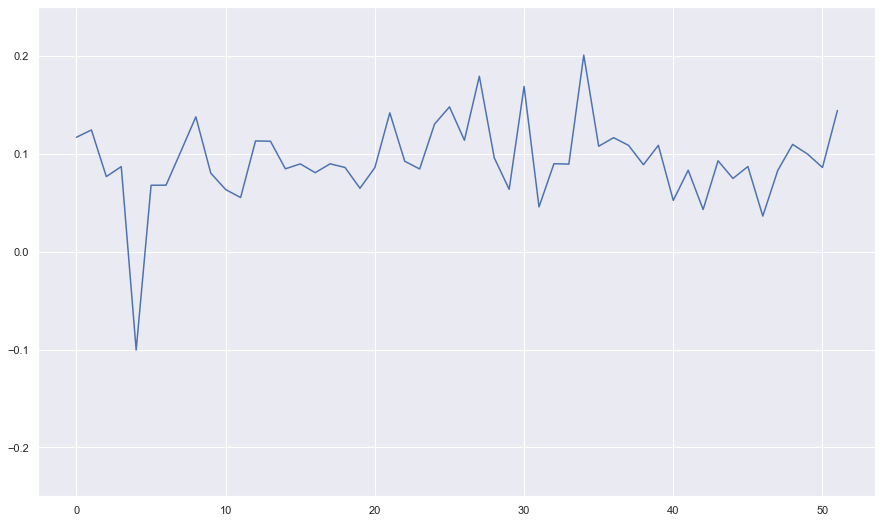

In [135]:
#plot the weekly average sentiment for 2015
pylab.rcParams['figure.figsize'] = (15, 9)
plt.ylim(-0.25, 0.25)
plt.plot(np.arange(0,52), weekly_pol['polarity'])

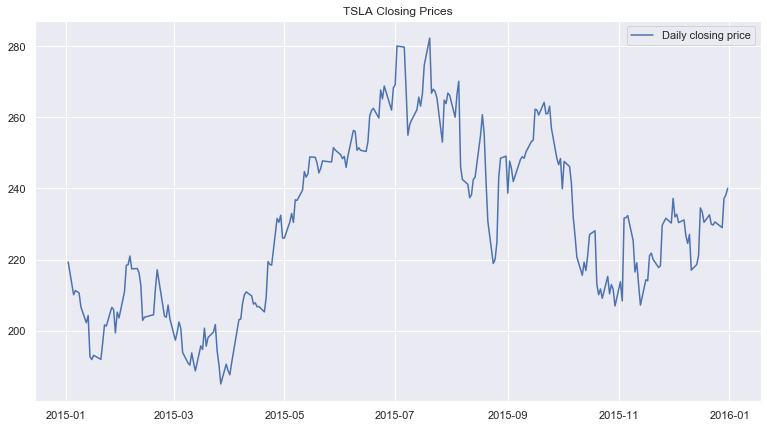

In [136]:
#get the weekly percent difference in the stock prices 
start = datetime.datetime(2015,1,1) # Beginning of period 
end = datetime.datetime(2016,1,1) # End of period 
stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start, end_date=end)
pylab.rcParams['figure.figsize'] = (13, 7)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.legend()
plt.show()

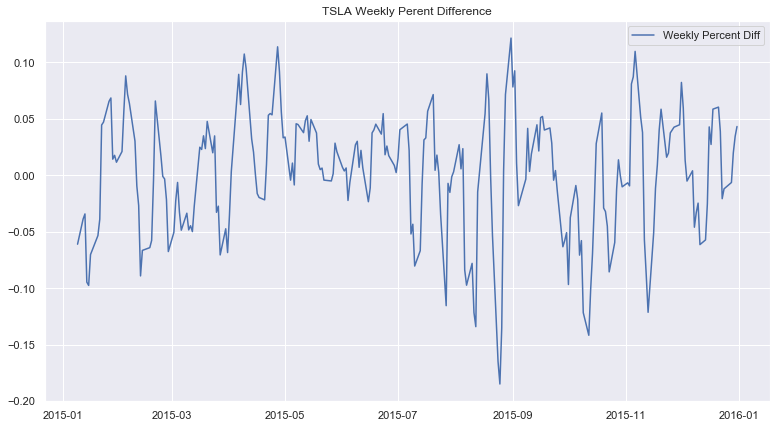

In [145]:
#get the weekly percent difference in the stock price
data["WeekPercDiff"] = data["Close"].diff(periods=5) / data["Close"]
plt.title(stock + " Weekly Perent Difference")
plt.plot(data["WeekPercDiff"],label="Weekly Percent Diff") # plot daily closing prices 
plt.legend()
plt.show()

In [138]:
data['weekofyear'] = data.index.weekofyear
data['weekday'] = data.index.weekday
data['year'] = data.index.year

In [139]:
#get price percent differences on fridays (weekday == 4)
wed_stocks = data.loc[data['weekday'] == 2]
wed_stocks.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,WeekPercDiff,weekofyear,weekday,year
Date,,,,,,,,,,,,,,,,
2015-01-07,213.35,214.780,209.78,210.95,2968390.0,0.0,1.0,213.35,214.780,209.78,210.95,2968390.0,NaN,2,2,2015
2015-01-14,185.83,195.200,185.00,192.69,11551855.0,0.0,1.0,185.83,195.200,185.00,192.69,11551855.0,-0.094764,3,2,2015
2015-01-21,189.55,198.680,189.51,196.57,4153043.0,0.0,1.0,189.55,198.680,189.51,196.57,4153043.0,-0.039070,4,2,2015
2015-01-28,206.11,206.368,198.42,199.37,3149606.0,0.0,1.0,206.11,206.368,198.42,199.37,3149606.0,0.014044,5,2,2015
2015-02-04,218.29,221.479,216.80,218.55,3305377.0,0.0,1.0,218.29,221.479,216.80,218.55,3305377.0,0.087760,6,2,2015


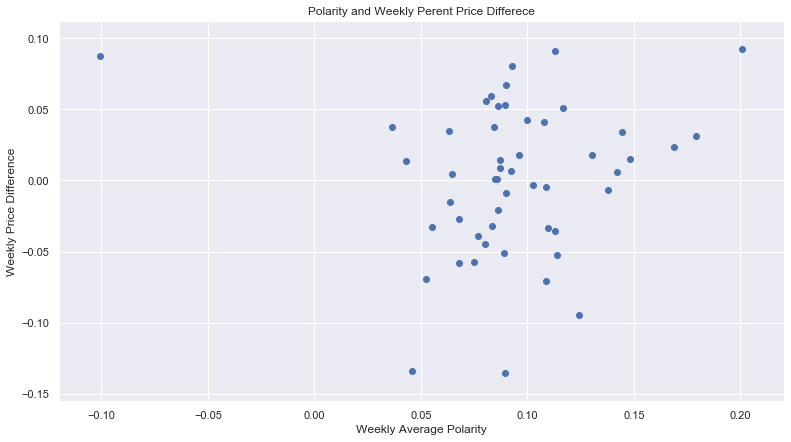

In [140]:
#weekly_pol['polarity'].shape
#wed_stocks["WeekPercDiff"].shape
plt.title("Polarity and Weekly Perent Price Differece")
plt.xlabel('Weekly Average Polarity')
plt.ylabel('Weekly Price Difference')
plt.scatter(weekly_pol['polarity'], wed_stocks["WeekPercDiff"])
plt.show()

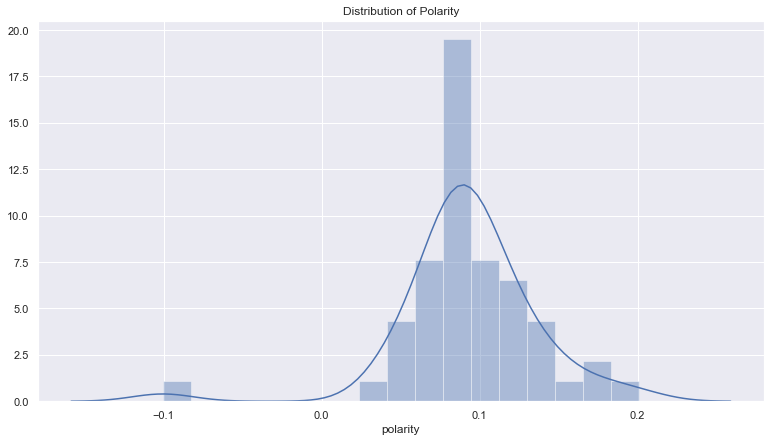

In [141]:
plt.title("Distribution of Polarity")
plt.xlabel("Polarity")
#plt.hist(weekly_pol['polarity'])
sns.distplot(weekly_pol['polarity'])
plt.show()

/Users/derek/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/derek/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  2.,   1.,   2.,   5.,   6.,   8.,  10.,   7.,   6.,   4.]),
 array([-0.13525173, -0.11250132, -0.08975091, -0.06700049, -0.04425008,
        -0.02149966,  0.00125075,  0.02400117,  0.04675158,  0.069502  ,
         0.09225241]),
 <a list of 10 Patch objects>)

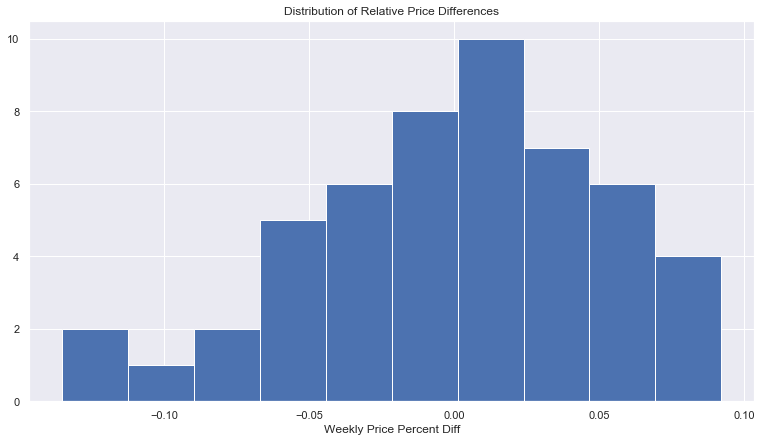

In [143]:
plt.title("Distribution of Relative Price Differences")
plt.xlabel("Weekly Price Percent Diff")
#sns.distplot(wed_stocks["WeekPercDiff"])
plt.hist(wed_stocks["WeekPercDiff"])